# Task 2: Prediction using Unsupervised ML
### **We will predict the optimum number of clusters and represent it visually.**

 ### **GRIP @ Sparks Foundation**
 ### Author: Deepa Khatri 

### `Import Packages`

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### `Load Data`

In [2]:
data_frame = pd.read_csv('C:\\Users\\desk\\Downloads\\Iris.csv')

In [3]:
data_frame.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### `Basic Checks`

In [4]:
data_frame.shape

(150, 6)

In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [6]:
data_frame.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data_frame.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

#### We have checked our data and 'ID' column is not required so will drop that column.

In [8]:
#drop Id column
data_frame = data_frame.drop('Id',axis=1)
data_frame.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### `Exploratory Data Analysis`

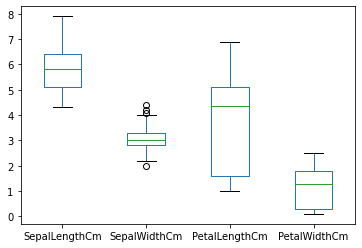

In [9]:
# box plots
data_frame.plot(kind='box', sharex=False, sharey=False)
plt.show()

#### We plotted box plot and checked for outliers, as we see we have outliers in sepal width.

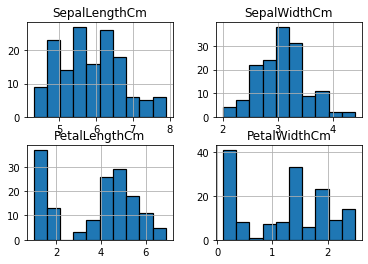

In [10]:
# histograms
data_frame.hist(edgecolor='black', linewidth=1.2)
plt.show()

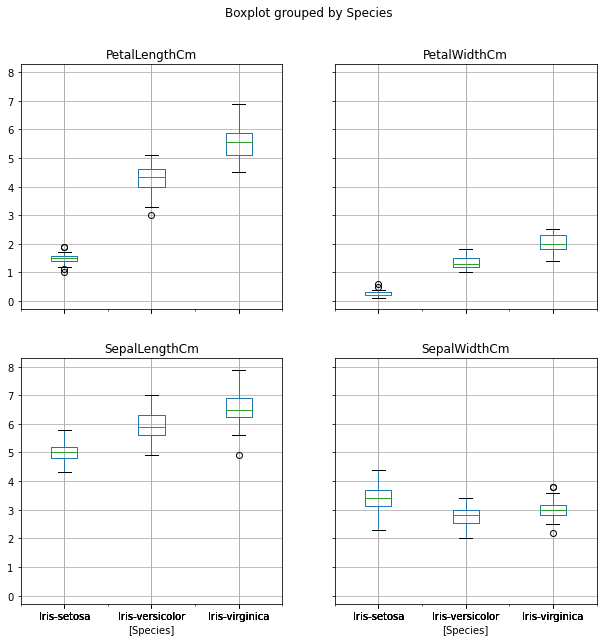

In [11]:
data_frame.boxplot(by="Species",figsize=(10,10))
plt.show()

#### We created boxplot grouped by 'Species'

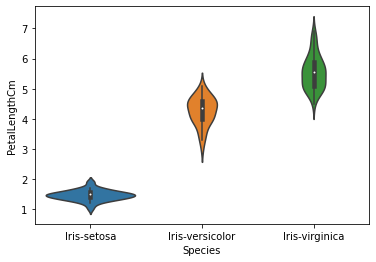

In [12]:
#Violinplot
sns.violinplot(data=data_frame,x="Species", y="PetalLengthCm")
plt.show()

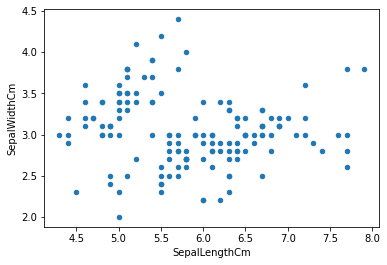

In [13]:
data_frame.plot.scatter('SepalLengthCm','SepalWidthCm')
plt.show()

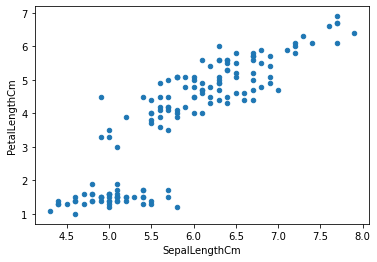

In [14]:
data_frame.plot.scatter('SepalLengthCm','PetalLengthCm')
plt.show()

#### Using seaborn pairplot to see the bivariate relation between each pair of features.

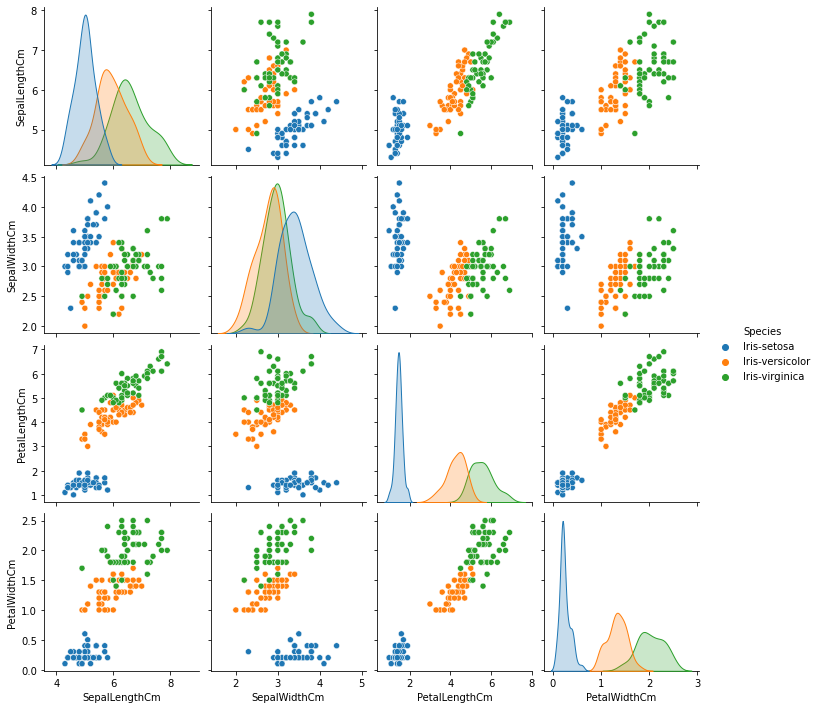

In [15]:
# Pairplot
sns.pairplot(data_frame, hue="Species")
plt.show()

#### From the plot, we can see that the species setosa is separataed from the other two across all feature combinations.

### `Preparing Data`

In [16]:
X = data_frame.iloc[:, :-1].values
y = data_frame.iloc[:, -1].values

#### Seperated the data into dependent and independent variables.

### `Training the Algorithm`

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from collections import Counter

In [18]:
kmeans5 = KMeans(n_clusters=3, random_state= 35)
y_kmeans5 = kmeans5.fit_predict(X)
print(y_kmeans5)

kmeans5.cluster_centers_

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [19]:
data = pd.DataFrame({'Actual': y, 'Predicted': y_kmeans5})  
data

,Actual,Predicted
0,Iris-setosa,0
1,Iris-setosa,0
2,Iris-setosa,0
3,Iris-setosa,0
4,Iris-setosa,0
...,...,...
145,Iris-virginica,2
146,Iris-virginica,1
147,Iris-virginica,2
148,Iris-virginica,2


### `Visualizing Clustering`

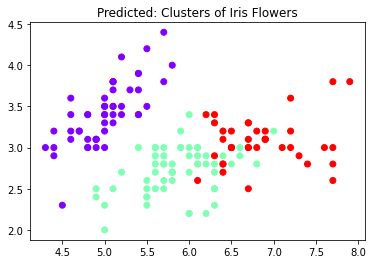

In [23]:
plt.scatter(X[:, 0], X[:, 1], c= y_kmeans5, cmap = 'rainbow')
plt.title('Predicted: Clusters of Iris Flowers')
plt.show()

#### We implemented k-means clustering using sklearn and Python, we can clearly see the three clusters. In case the Elbow method doesn’t work, there are several other methods that can be used to find optimal value of k.